<a href="https://colab.research.google.com/github/Iqra456/Pre-owned-car-s-price-Prediction/blob/main/Pre_owned_car's_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#importing data
cars_data = pd.read_csv("cars_sampled.csv")
cars_data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [ ]:
#copy of cars_data
cars = cars_data.copy()

In [ ]:
#data info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [ ]:
#summarizing data
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [ ]:
#dropping unwanted columns
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(columns=col, axis=1)

In [ ]:

#Removing duplicates records
cars.drop_duplicates(keep='first', inplace=True)

In [ ]:
#data cleaning
#missing values
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

# **Data Preprocessing**

In [ ]:
#variable yearOfRegistration
cars['yearOfRegistration'].value_counts().sort_index()

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

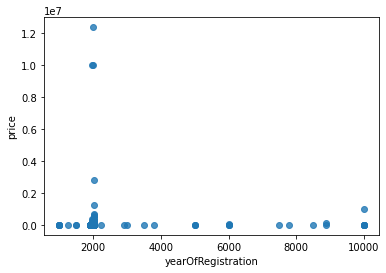

In [ ]:
sns.regplot(x=cars['yearOfRegistration'], y=cars['price'],
           scatter=True, fit_reg=False)

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64
count    4.953100e+04
mean     6.567220e+03
std      8.622238e+04
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.100000e+03
max      1.234568e+07
Name: price, dtype: float64


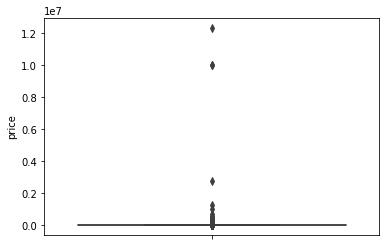

In [ ]:

#variable price
print(cars['price'].value_counts().sort_index())
print(cars['price'].describe())
sns.boxplot(y=cars['price'])

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64
count    49531.000000
mean       116.500515
std        231.535603
min          0.000000
25%         69.000000
50%        105.000000
75%        150.000000
max      19312.000000
Name: powerPS, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


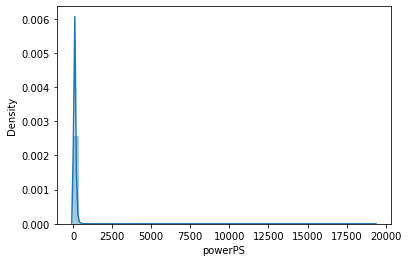

In [ ]:
#variable powerPS
print(cars['powerPS'].value_counts().sort_index())
print(cars['powerPS'].describe())
sns.distplot(cars['powerPS'])

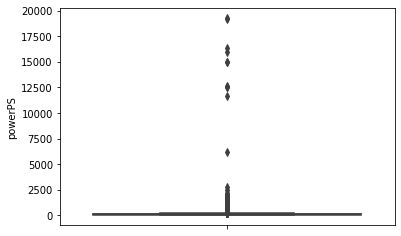

In [ ]:
#boxplot
sns.boxplot(y=cars['powerPS'])

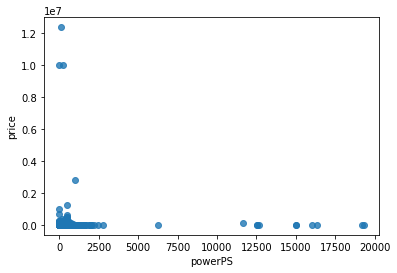

In [ ]:
#regplot
sns.regplot(x=cars['powerPS'], y=cars['price'],
           scatter=True, fit_reg=False)

In [ ]:
#working range of data
cars = cars[(cars.yearOfRegistration<=2018) &
           (cars.yearOfRegistration>=1950) &
           (cars.price>=100) &
           (cars.price<=150000) &
           (cars.powerPS>=10) &
           (cars.powerPS<=500)]

In [ ]:
#change in shape of data
print(cars_data.shape)
print(cars.shape)

(50001, 19)
(42772, 14)


In [ ]:
#combining yearOfRegistration and monthOfRegistration
cars['monthOfRegistration']/=12

In [ ]:
#creating new variable
cars['Age'] = (2018-cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)
cars['Age'].describe()

count    42772.000000
mean        14.872642
std          7.093125
min          0.000000
25%         10.330000
50%         14.830000
75%         19.170000
max         67.750000
Name: Age, dtype: float64

In [ ]:
#dropping yearOfRegistration and monthOfRegistration
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)

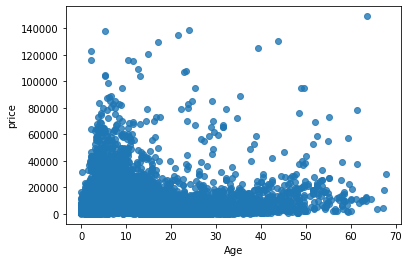

In [ ]:
#age vs price
sns.regplot(x=cars['Age'], y=cars['price'],
           scatter=True, fit_reg=False) #with increase in age, price decreases

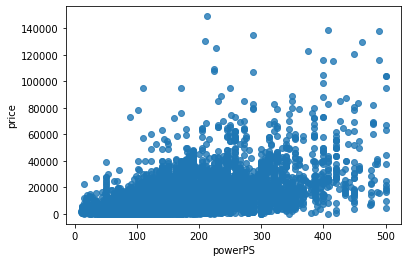

In [ ]:
#powerPS vs price
sns.regplot(x=cars['powerPS'], y=cars['price'],
           scatter=True, fit_reg=False) #with increase in powerPS, price increases

In [ ]:
#variable seller
print(cars['seller'].value_counts())
pd.crosstab(cars['seller'],columns='count', normalize=True) #insignificant variable

private       42771
commercial        1
Name: seller, dtype: int64


col_0,count
seller,
commercial,0.000023
private,0.999977


In [ ]:
#variable OfferType
print(cars['offerType'].value_counts())
pd.crosstab(cars['offerType'],columns='count', normalize=True) #insignificant variable

offer    42772
Name: offerType, dtype: int64


col_0,count
offerType,
offer,1.0


In [ ]:
#variable abtest
print(cars['abtest'].value_counts())
pd.crosstab(cars['abtest'],columns='count', normalize=True) #equally distributed - insignificant

test       22128
control    20644
Name: abtest, dtype: int64


col_0,count
abtest,
control,0.482652
test,0.517348


limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64
col_0             count
vehicleType            
bus            0.090159
cabrio         0.069982
coupe          0.056672
limousine      0.294415
others         0.008171
small car      0.232730
station wagon  0.202426
suv            0.045443


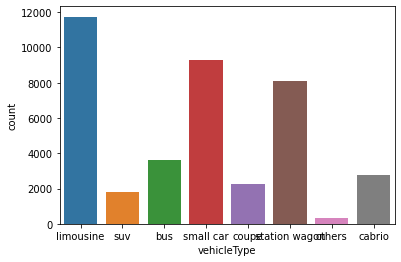

In [ ]:

#variable vehicleType
print(cars['vehicleType'].value_counts())
print(pd.crosstab(cars['vehicleType'],columns='count', normalize=True))
sns.countplot(x='vehicleType', data=cars)        #vehicleType affects price

manual       32582
automatic     9396
Name: gearbox, dtype: int64
col_0         count
gearbox            
automatic  0.223832
manual     0.776168


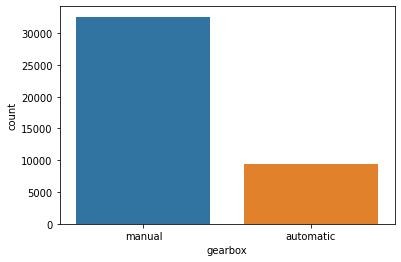

In [ ]:
#variable gearbox
print(cars['gearbox'].value_counts())
print(pd.crosstab(cars['gearbox'],columns='count', normalize=True))
sns.countplot(x='gearbox', data=cars)        #gearbox affects price

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
serie_2          1
200              1
serie_3          1
elefantino       1
rangerover       1
Name: model, Length: 247, dtype: int64
col_0       count
model            
100      0.001144
145      0.000097
147      0.001412
156      0.001582
159      0.000462
...           ...
yaris    0.003213
yeti     0.000657
ypsilon  0.000535
z_reihe  0.003018
zafira   0.007910

[247 rows x 1 columns]


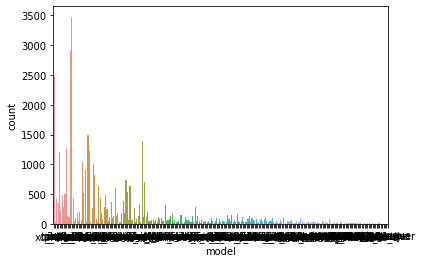

In [ ]:

#variable model
print(cars['model'].value_counts())
print(pd.crosstab(cars['model'],columns='count', normalize=True))
sns.countplot(x='model', data=cars)      #distributed over many models

150000    27430
125000     4597
100000     1824
90000      1484
80000      1378
70000      1182
60000      1101
50000       932
40000       795
30000       712
20000       651
5000        479
10000       207
Name: kilometer, dtype: int64
col_0         count
kilometer          
5000       0.011199
10000      0.004840
20000      0.015220
30000      0.016646
40000      0.018587
50000      0.021790
60000      0.025741
70000      0.027635
80000      0.032217
90000      0.034696
100000     0.042645
125000     0.107477
150000     0.641307


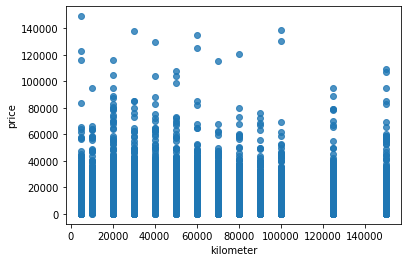

In [ ]:
#variable kilometer
print(cars['kilometer'].value_counts())
print(pd.crosstab(cars['kilometer'],columns='count', normalize=True))
sns.regplot(x=cars['kilometer'], y=cars['price'],
           scatter=True, fit_reg=False)      #considered in modelling

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64
col_0        count
fuelType          
cng       0.001742
diesel    0.319950
electro   0.000249
hybrid    0.000896
lpg       0.017175
other     0.000149
petrol    0.659838


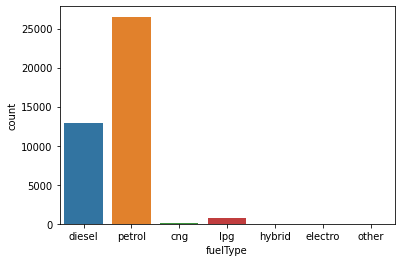

In [ ]:
#variable fuelType
print(cars['fuelType'].value_counts())
print(pd.crosstab(cars['fuelType'],columns='count', normalize=True))
sns.countplot(x='fuelType', data=cars)      #fuelType affects price

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64
col_0              count
brand                   
alfa

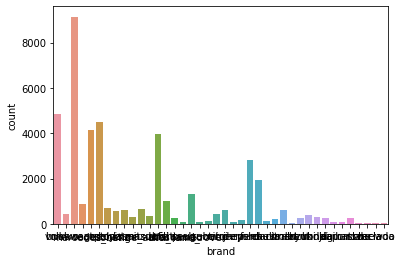

In [ ]:
#variable brand
print(cars['brand'].value_counts())
print(pd.crosstab(cars['brand'],columns='count', normalize=True))
sns.countplot(x='brand', data=cars)      #distributed over many brands

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64
col_0                 count
notRepairedDamage          
no                 0.890725
yes                0.109275


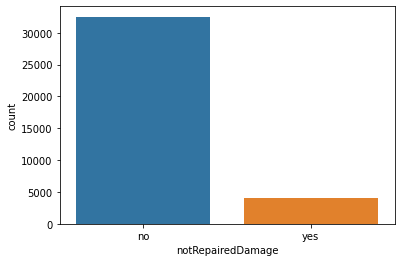

In [ ]:
#variable notRepairedDamage
print(cars['notRepairedDamage'].value_counts())
print(pd.crosstab(cars['notRepairedDamage'],columns='count', normalize=True))
sns.countplot(x='notRepairedDamage', data=cars)      #fall under lower price range

In [ ]:
#Removing insignificant variables
cols = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns=cols, axis=1)
print(cars.shape)



(42772, 10)


In [ ]:
#correlation
cars_select1 = cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS      0.575234
kilometer    0.440138
Age          0.335821
Name: price, dtype: float64

In [ ]:
#omitting missing values
cars_omit = cars.dropna(axis=0)
cars_omit.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [ ]:
#converting categorical variables to dummy variables
cars_omit = pd.get_dummies(cars_omit, drop_first=True)

# **Model building with omitted data**

**LINEAR REGRESSION**




In [ ]:
#separating input and output features
x = cars_omit.drop(['price'], axis='columns', inplace=False)
y = cars_omit['price']

In [ ]:
#transforming price as a logarithms value
y = np.log(y)

In [ ]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [ ]:

#Baseline model for omitted data
#finding the mean for test data
base_pred = np.mean(y_test)
print(base_pred)
#repeating some values till length of test data
base_pred = np.repeat(base_pred, len(y_test))
#finding the RMSE
base_rmse = np.sqrt(mean_squared_error(y_test, base_pred))
print("Baseline RMSE : ",base_rmse)

8.249615787653337
Baseline RMSE :  1.1274483657478247


In [ ]:
#Linear Regression with omitted data
#setting intercept as true
lgr = LinearRegression(fit_intercept=True)
#model
model_LR = lgr.fit(x_train, y_train)
#predicting model on test data
cars_prediction_LR = lgr.predict(x_test)

In [ ]:

#computing MSE AND RMSE
LR_mse = mean_squared_error(y_test, cars_prediction_LR)
LR_rmse = np.sqrt(LR_mse)
print("MSE : ",LR_mse)
print("RMSE : ",LR_rmse)

MSE :  0.2976227584928348
RMSE :  0.5455481266513843


In [ ]:

#R-Squared value
LR_test = model_LR.score(x_test, y_test)
LR_train = model_LR.score(x_train, y_train)
print("test set : ",LR_test)
print("train set : ",LR_train)

test set :  0.7658615091649241
train set :  0.7800936978183916


count    9866.000000
mean        0.003352
std         0.545565
min        -5.796435
25%        -0.260941
50%         0.041057
75%         0.301637
max         4.547147
Name: price, dtype: float64


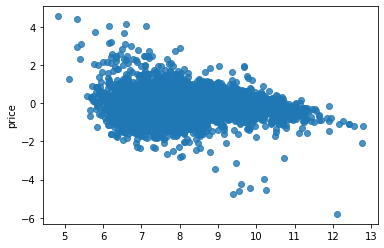

In [ ]:

#Regression Diagonistics - Residual plot analysis
residual = y_test-cars_prediction_LR
sns.regplot(x=cars_prediction_LR, y=residual, scatter=True, fit_reg=False, data=cars)
print(residual.describe())